In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df_raw = pd.read_csv("data/HTRU_2.csv")

labels = ["profile_mean", "profile_stdev", "profile_skewness", "profile_kurtosis", "dm_mean", "dm_stdev", "dm_skewness", "dm_kurtosis", "pulsar"]
df_raw.columns = labels

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile_mean      17897 non-null  float64
 1   profile_stdev     17897 non-null  float64
 2   profile_skewness  17897 non-null  float64
 3   profile_kurtosis  17897 non-null  float64
 4   dm_mean           17897 non-null  float64
 5   dm_stdev          17897 non-null  float64
 6   dm_skewness       17897 non-null  float64
 7   dm_kurtosis       17897 non-null  float64
 8   pulsar            17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [3]:
df_raw.describe()

,profile_mean,profile_stdev,profile_skewness,profile_kurtosis,dm_mean,dm_stdev,dm_skewness,dm_kurtosis,pulsar
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.00000


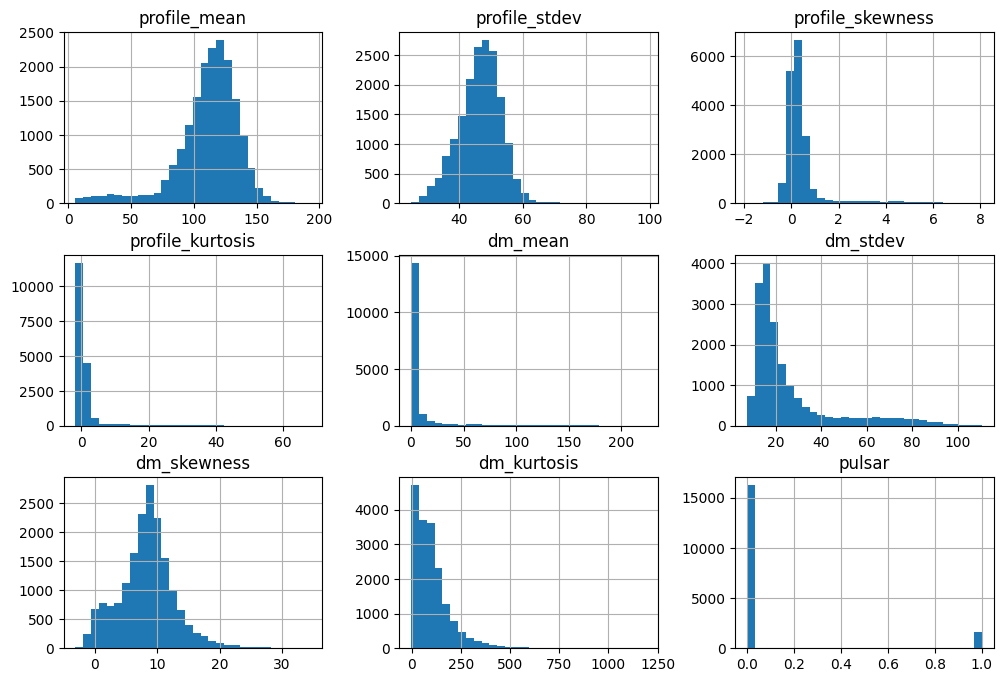

In [4]:
df = df_raw

# Histogramas
df.hist(figsize=(12, 8), bins=30)
plt.show()

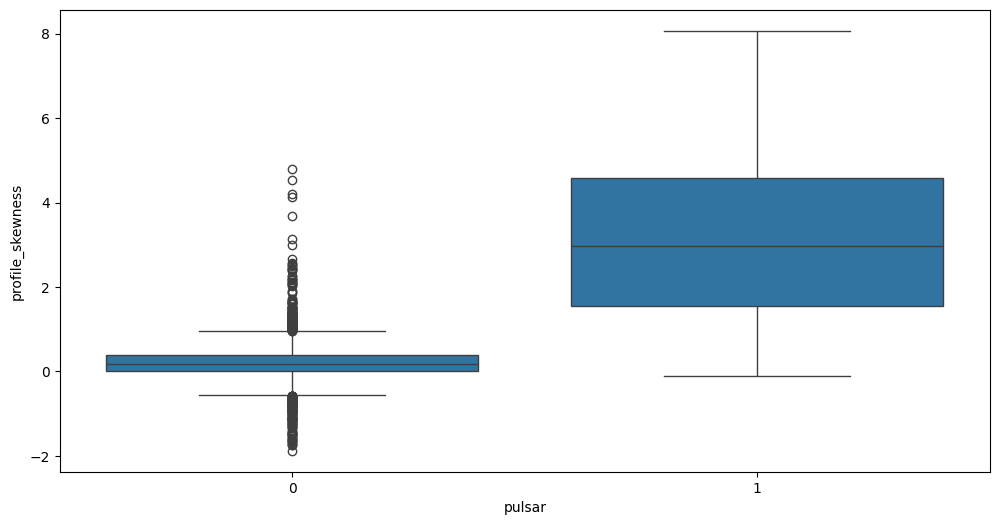

In [5]:
# Boxplots por classe de pulsar
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="pulsar", y="profile_skewness")
plt.show()

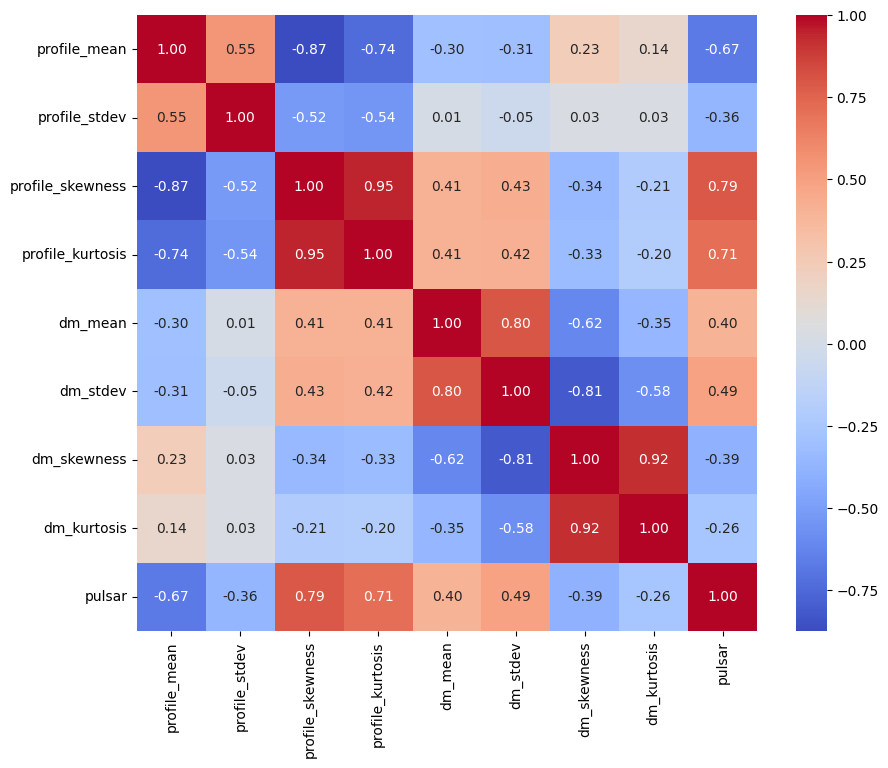

In [6]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

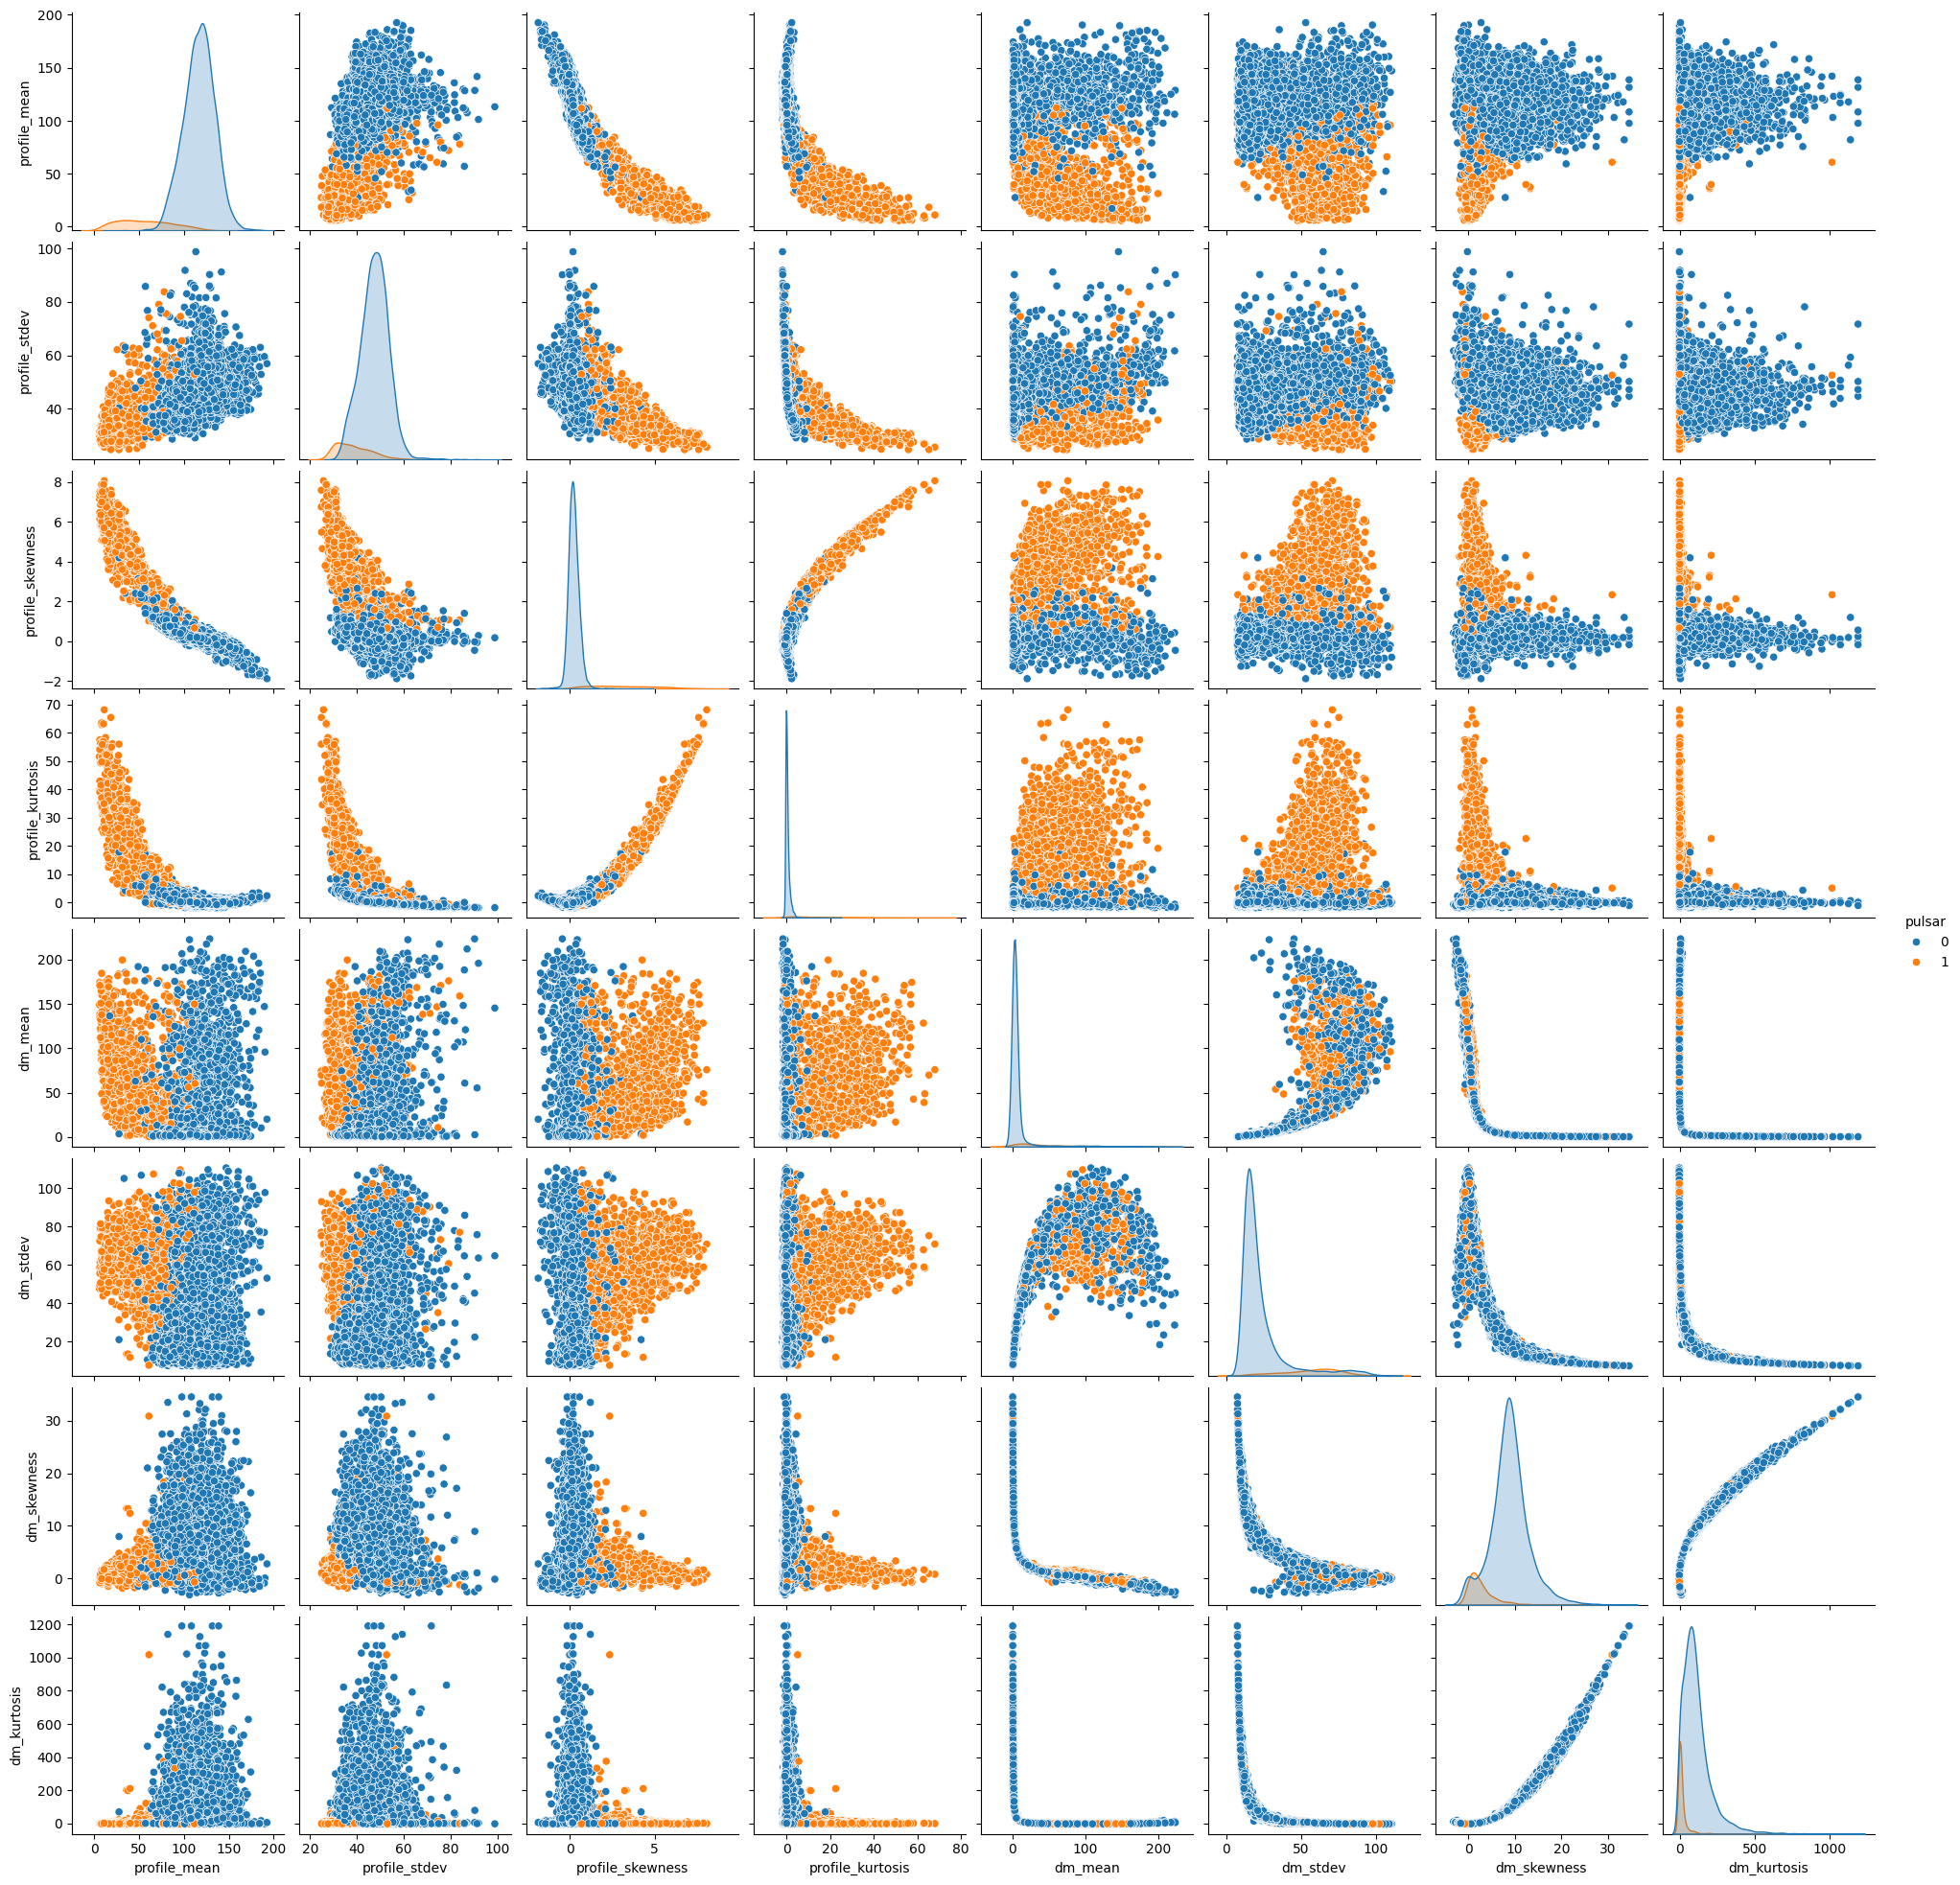

In [7]:
sns.pairplot(df, hue="pulsar", diag_kind="kde")
plt.show()


In [8]:
grupo_0 = df[df["pulsar"] == 0]["profile_mean"]
grupo_1 = df[df["pulsar"] == 1]["profile_mean"]

stat, p = ttest_ind(grupo_0, grupo_1, equal_var=False)
print(f"Teste t: stat={stat:.3f}, p-valor={p:.3f}")


Teste t: stat=79.427, p-valor=0.000
